In [3]:
import math
import itertools

import numpy as np
from numpy import random

import matplotlib.pyplot as plt

In [4]:
x = random.rand()
x

0.09008964333993208

In [5]:
def convert_base(x, base=2, precision=1000):
    x = x - int(x)
    exponents = range(-1, (-precision - 1) * 2, -1)
    for e in exponents:
        d = int(x // (base ** e))
        x -= d * (base ** e)
        yield d
        if x == 0: break

In [6]:
# Evaluates a binary form
sum(d * (2 ** (-i - 1)) for i, d in enumerate(convert_base(x)))

0.09008964333993208

# Cantor Set

In [7]:
def cantor_sample(precision=100):
    # Uses the bijection between [0, 1] and the Cantor set that takes x in [0, 1] in binary form, replaces the 1's with 2's
    # and reinterprets it as a ternary number.
    x = random.rand()
    base = convert_base(x, 2, precision)
    
    #converts the binary form to ternary and evaluates it as a real number.
    val = sum(2*d * (3 ** (-i - 1)) for i, d in enumerate(convert_base(x)))
    return val

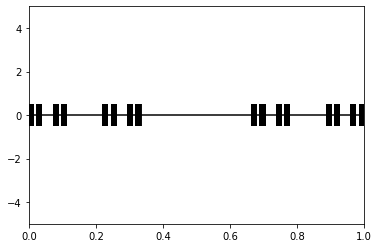

In [8]:
# set up the figure
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(0,1)
ax.set_ylim(-5,5)

# draw lines
xmin = 0
xmax = 1
y = 0
height = 1

plt.hlines(y, xmin, xmax)

# draw a point on the line
px = [cantor_sample() for _ in range(1000)]
py = [y for i in range(len(px))]

for i in range(len(px)):
    plt.vlines(px[i], py[i] - height / 2., py[i] + height / 2.)
plt.show()

# Sierpinski Triangle

In [13]:
def sierpinski_sample(precision=100):
    # Takes a random number in [0, 1] and uses it to navigate the Left/Top/Right tree.
    x = random.rand()
    s_x, s_y = 0, 0
    path = convert_base(x, 3, precision)
    exp = 1
    c = 0
    for p in path:
        exp -= 1
        if p == 0:
            pass
        elif p == 1:
            s_x += 0.25 * 2 ** exp
            s_y += 0.5 * 2 ** exp
            if exp == -5: c = 2
        elif p == 2:
            s_x += 0.5 * 2 ** exp
            if exp == -7: c += 1
    return s_x, s_y, c

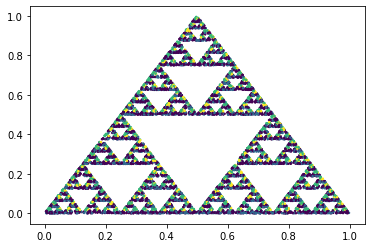

In [14]:
data = [sierpinski_sample() for _ in range(10000)]
x, y, c = np.array(data).T
plt.scatter(x, y, s=2, c=c)
plt.show()

In [22]:
data[91]

(0.2004230773508877, 0.3373662234844381, 2)